In [ ]:
import numpy as np
import pandas as pd

data = {
        "ev_boyutu":[50,60,70,80,90,100,110,120,130,140],
        "ev_fiyatı":[15000,20000,25000,30000,35000,40000,45000,50000,55000,60000]
}

df=pd.DataFrame(data)
print(df)

   ev_boyutu  ev_fiyatı
0         50      15000
1         60      20000
2         70      25000
3         80      30000
4         90      35000
5        100      40000
6        110      45000
7        120      50000
8        130      55000
9        140      60000


In [ ]:
X=df[['ev_boyutu']]
y=df.ev_fiyatı
print(X)
print(y)

   ev_boyutu
0         50
1         60
2         70
3         80
4         90
5        100
6        110
7        120
8        130
9        140
0    15000
1    20000
2    25000
3    30000
4    35000
5    40000
6    45000
7    50000
8    55000
9    60000
Name: ev_fiyatı, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

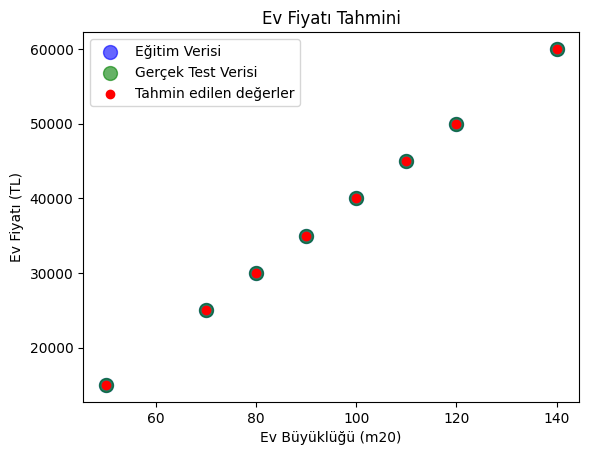

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_train,y_train,color='blue',label='Eğitim Verisi',alpha=0.6,s=100)
plt.scatter(x_train,y_train,color='green',label='Gerçek Test Verisi',alpha=0.6,s=100)
plt.scatter(x_train,y_train,color='red',label='Tahmin edilen değerler')

plt.xlabel('Ev Büyüklüğü (m20)')
plt.ylabel('Ev Fiyatı (TL)')
plt.title('Ev Fiyatı Tahmini')
plt.legend()
plt.show()

In [ ]:
model.score(x_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print(f"β0 (sabit terim):{model.intercept_}")
print(f"β1 (eğitim katsayısı):{model.coef_[0]}")

β0 (sabit terim):-10000.000000000007
β1 (eğitim katsayısı):500.00000000000006


In [ ]:
r2=r2_score(y_test,y_pred)
r2

1.0

In [ ]:
# adjusted r2 score

n=x_test.shape[0]
p=x_test.shape[1]
adjusted_r2=1 - (1-r2) * (n-1) / n-p-1

print(adjusted_r2)

-1.0


In [ ]:
mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)

(1.8189894035458565e-12, 6.617444900424222e-24)

In [ ]:
# r2 0 ile 1 arasında bir sayı almalı.Hedefimiz yüksek r2
# Düşük mse değeri modelin iyi olduğunu gösterir
# Adjusted r2 bağımsız değiken sayısı arttıkça r2 skorundan daha iyi skor verebilir